In [1]:
#!pip install networkx --user
import numpy as np
import networkx as nx
print("Networkx version: {}".format(nx.__version__))
from time import time
import matplotlib.pyplot as plt
import random
import seaborn as sns
sns.set()

print("numpy version: {}".format(np.__version__))
print("Networkx version: {}".format(nx.__version__))

from scipy.stats import norm
import numexpr
numexpr.print_versions()
%matplotlib inline

Networkx version: 2.4
numpy version: 1.18.1
Networkx version: 2.4
*Warning*: NumPy version is lower than recommended: 1.18.1 < 1.7.0
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Numexpr version:   2.6.8
NumPy version:     1.18.1
Python version:    3.7.9 (default, Aug 31 2020, 12:42:55) 
[GCC 7.3.0]
Platform:          linux-x86_64-#1 SMP Wed Oct 21 13:44:38 EDT 2020
CPU vendor:        
CPU model:         
CPU clock speed:    MHz
VML available?     True
VML/MKL version:   Intel(R) Math Kernel Library Version 2020.0.2 Product Build 20200624 for Intel(R) 64 architecture applications
Number of threads used by default: 8 (out of 64 detected cores)
Maximum number of threads: 64
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


In [2]:
import tensorflow as tf
print(tf.__version__)

import os
print(os.environ['HOME'])
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1"

if tf.test.gpu_device_name() == '/device:GPU:0':
  print("Using a GPU")
else:
  print("Using a CPU")

import tensorflow as tf
import tensorflow_probability as tfp

tfd = tfp.distributions
tfb = tfp.bijectors

from tensorflow_probability import edward2 as ed
tfd = tfp.distributions

#from numba import cuda 
#device = cuda.get_current_device()
#device.reset()

2.0.0
/u/yan30
Using a GPU


In [3]:
len(Gorig)

NameError: name 'Gorig' is not defined

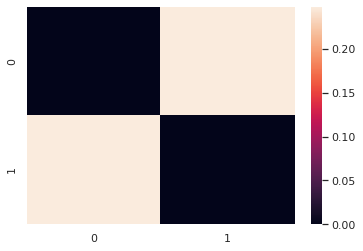

In [4]:
Gorig = nx.read_edgelist("data/co-expression.tsv", delimiter='\t' , nodetype=str,  data=(('weight',float),))
for u,v,d in Gorig.edges(data=True):
    Gorig[u][v]['weight']= Gorig[u][v]['weight'] + np.random.normal(0,0.001)
#H = Gorig.subgraph(['ACD', 'ABL1', 'ACTL6A', 'ACTR5', 'ACTR8', 'ALKBH1', 'ALKBH2', 'ALKBH3'])
#mapping = {'ACD':6, 'ABL1':3, 'ACTL6A':7, 'ACTR5':5, 'ACTR8':0, 'ALKBH1':1, 'ALKBH2':2, 'ALKBH3':4}
H = Gorig.subgraph(['ACD', 'ABL1', 'ACTL6A', 'ACTR5', 'ACTR8', 'ALKBH3'])
mapping = {'ACD':6, 'ABL1':3, 'ACTL6A':7, 'ACTR5':5, 'ACTR8':0, 'ALKBH3':4}
G0 = nx.relabel_nodes(H, mapping)
A = nx.adjacency_matrix(G0).todense()
ax = sns.heatmap(A)

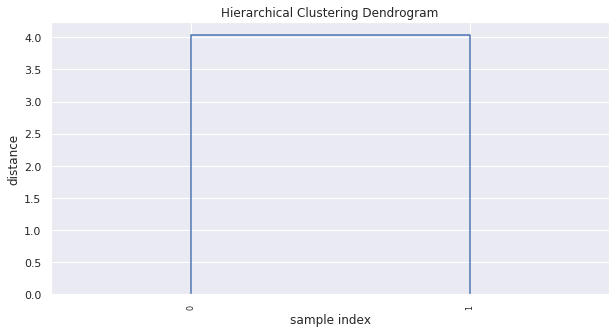

array([[0.       , 1.       , 4.0305716, 2.       ]])

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

for u,v,d in G0.edges(data=True):
    G0[u][v]['weight']= 1.0/G0[u][v]['weight']

A = nx.adjacency_matrix(G0).todense()    
listA = squareform(A)
Z = linkage(listA, 'ward')

plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()
Z

In [289]:
import networkx as nx
from networkx import relabel

Gnew = relabel.convert_node_labels_to_integers(Gorig, label_attribute = "term") #initilaization
terms = nx.get_node_attributes(Gnew, 'term')
terms

{0: 'ACD',
 1: 'ADNP',
 2: 'ALKBH2',
 3: 'ALKBH3',
 4: 'APEX1',
 5: 'APEX2',
 6: 'APLF',
 7: 'APTX',
 8: 'ATAD5',
 9: 'ATM',
 10: 'ATR',
 11: 'ATRIP',
 12: 'ATRX',
 13: 'BARD1',
 14: 'BCCIP',
 15: 'BLM',
 16: 'BRAT1',
 17: 'BRCA1',
 18: 'BRCA2',
 19: 'BRCC3',
 20: 'BRE',
 21: 'BRIP1',
 22: 'CBX3',
 23: 'CCNA2',
 24: 'CCNH',
 25: 'CDC7',
 26: 'CDC45',
 27: 'CDK2',
 28: 'CDK7',
 29: 'CENPK',
 30: 'CEP152',
 31: 'CETN2',
 32: 'CETN3',
 33: 'CHAF1A',
 34: 'CHEK1',
 35: 'CHEK2',
 36: 'CHTF18',
 37: 'CKS2',
 38: 'CLK2',
 39: 'CLSPN',
 40: 'DBF4B',
 41: 'DCLRE1A',
 42: 'DCLRE1B',
 43: 'DCLRE1C',
 44: 'DDB1',
 45: 'DDB2',
 46: 'DHX9',
 47: 'DMC1',
 48: 'DNA2',
 49: 'DRG1',
 50: 'DSCC1',
 51: 'DTL',
 52: 'DUT',
 53: 'EME1',
 54: 'EME2',
 55: 'ENDOV',
 56: 'ERCC1',
 57: 'ERCC2',
 58: 'ERCC3',
 59: 'ERCC4',
 60: 'ERCC5',
 61: 'ERCC6',
 62: 'ERCC8',
 63: 'EXO1',
 64: 'FAAP20',
 65: 'FAAP24',
 66: 'FAAP100',
 67: 'FAM175A',
 68: 'FAN1',
 69: 'FANCA',
 70: 'FANCB',
 71: 'FANCC',
 72: 'FANCD2',
 73: 

In [287]:
import pandas as pd
#!!!! get a sub-branch of OG so that Gref becomes a subset of 306 genes
df = pd.read_csv('data/pearl2015.txt', sep='\t', header=None)
#df.to_csv('pdTest.csv')
Gref = nx.from_pandas_edgelist(df,1,0,[2],nx.DiGraph)
genes = [u for u,v,e in Gref.edges(data=True) if e[2] == 'Gene-Term']
genes = list(set(genes))
len(genes)

437

In [290]:
match = []
for gene in genes:
    if gene in terms.values():
        match.append(gene)
len(match)

231

In [8]:
def get_level(level):
    for child in Gref.nodes():
        if Gref.nodes[child]['level'] == level: #get all nodes at level
            newLevel = level
            for parent in Gref.successors(child): #get parents one level above
                newLevel = level+1
                if newLevel > Gref.nodes[parent]['level']: #check if the parent's level needs to be raised
                    Gref.nodes[parent]['level'] = newLevel
    return newLevel

for node in Gref.nodes():
    if len(Gref.in_edges(node, data=True)) == 0: #terminal nodes
        Gref.nodes[node]['level'] = 0
    else: Gref.nodes[node]['level'] = -1
level = 0
newLevel = 0
while  newLevel == level:
    newLevel = get_level(level)
    level += 1
    print(newLevel)
        
sorted(Gref.nodes(data=True), key=lambda t: t[1].get('level', 1), reverse = True)

1
2
3
4
5
5


[('Repair pathway', {'level': 5}),
 ('Associated process', {'level': 4}),
 ('Telomere maintenance', {'level': 3}),
 ('Ubiquitin response', {'level': 3}),
 ('SSR', {'level': 3}),
 ('Alternative mechanism', {'level': 2}),
 ('Checkpoint factors', {'level': 2}),
 ('TLS', {'level': 2}),
 ('BER', {'level': 2}),
 ('Deubiquitinating enzyme (DUB)', {'level': 2}),
 ('DSR', {'level': 2}),
 ('Genes with probable DDR role', {'level': 2}),
 ('MMR', {'level': 2}),
 ('NER', {'level': 2}),
 ('Ubiquitin- activating enzymes (E1)', {'level': 2}),
 ('Ubiquitin- conjugating enzymes (E2)', {'level': 2}),
 ('Ubiquitin ligases (E3)', {'level': 2}),
 ('Ubiquitin-like proteins (UBLs)', {'level': 2}),
 ('Ubiquitins and Ubiquitin-like proteins', {'level': 2}),
 ('MRN Complex', {'level': 1}),
 ('Alt-NHEJ', {'level': 1}),
 ('AP endonucleases', {'level': 1}),
 ('Chromatin remodelling', {'level': 1}),
 ('Chromosome segregation', {'level': 1}),
 ('DNA replication', {'level': 1}),
 ('Modulation of nucleotide pools', {'l

In [309]:
tfd.Normal(loc=[2]*batchSize, scale=0.01).sample()

<tf.Tensor: id=118704, shape=(20,), dtype=float32, numpy=
array([2.000489 , 1.9932226, 1.9943951, 2.0026486, 1.9956797, 2.0189283,
       1.9946777, 2.004446 , 2.0004566, 2.0069   , 1.9849111, 1.9853485,
       2.0046005, 1.9868655, 1.9978888, 2.000657 , 1.9934024, 2.0153146,
       1.9907584, 1.9899036], dtype=float32)>

In [9]:
#Define the joint_log_prob function, and our unnormalized posterior.
def SBM_log_prob(z, batchSize, B, b0, directed=False, selfloops=False):
  # the SBM log-likelihood generative steps
    n = z.shape[0]
    #k = int(n/2)
    #pi = ed.Dirichlet(name='pi', concentration=np.ones(k), sample_shape=[n])
    #eta = tfd.Normal(loc=0, scale=0.01).sample([k,k]) #beta prior for simple edges
    #z = tf.reshape(tfd.Sample(tfd.Categorical(probs=pi),1).sample(), [n,])
    #z = tfd.Bernoulli(probs=pi).sample()
    #z0 = tf.cast(z, tf.float32)
    p = tf.matmul(tf.matmul(z,B),tf.transpose(z))
    A = tfd.Normal(loc=p+b0, scale=0.01)
    #    unsupervised tree/DAG shrinking by factors of 2, supervised grouping by suggesting mergers in a similar ratio 
    #    use tfd.MixtureSameFamily to automatically integrate out the z draws. Construct the mixture dist from pair-wise counting of z draws
    #    p = eta[(z.reshape((n, 1)), z.reshape((1, n)))][triu_indices] #replace with equation 5.5 for analytical posterior, including DC?
    #if weighted:
    #    A = ed.Poisson(name = 'A', mu=p, shape=A_obs[0].shape, observed=A_obs) #collect edge/non-edge statistics for the analytical posterior
    #else:
    return A

In [10]:
class VariationalEstep0(tf.keras.Model):
#Optimizes pi and z with fixed phi, B, B0, (a, b are ommitted at the moment)

    def __init__(self, k, name=None):
        super(VariationalEstep, self).__init__(name=name)
        self.w_loc = tf.Variable(tf.random.normal([k, k]), name='w_loc')
        self.w_std = tf.Variable(tf.random.normal([k, k]), name='w_std')
        self.b_loc = tf.Variable(tf.random.normal([1]), name='b_loc')
        self.b_std = tf.Variable(tf.random.normal([1]), name='b_std')
    
    @property
    def weight(self):
        """Variational posterior for the weight"""
        return tfd.Normal(self.w_loc, tf.exp(self.w_std))
    
    @property
    def bias(self):
        """Variational posterior for the bias"""
        return tfd.Normal(self.b_loc, tf.exp(self.b_std))
    
    # for guided z and pi evaluation
    def call(self, z, n, batchSize):
        """Predict p(y|x)"""
        #sample = lambda x: x.sample() if sampling else x.mean()
        return SBM_log_prob(z, batchSize, self.weight.sample(), self.bias.sample(n))
    
    def KLlosses(self, GrefBlkVars, B0):
        prior = tfd.Normal(GrefBlkVars, tf.exp(self.w_std))
        prior2 = tfd.Normal(B0, tf.exp(self.b_std))
        return tf.reduce_sum(tfd.kl_divergence(self.weight, prior)+tfd.kl_divergence(self.bias, prior2))

In [11]:
# Function to compute the log posterior probability
import cProfile 
import itertools as it

#def f():
Gnew = relabel.convert_node_labels_to_integers(H, label_attribute = "term") #initilaization
k = len(Gnew)
label = np.zeros(k)
label[1]=0
label[2]=2
label[3]=0
label[4]=1
label[5]=1
#label[k-1]=4
knew = int(max(label)+1)

pi0 = ed.Beta(name='test', concentration1=0.5, concentration0=0.5, sample_shape=[len(Gnew),knew])
labelOneHot = tf.one_hot(label.astype(int), knew, dtype = "float32")
ppi = ((labelOneHot*9 + pi0)/10)
print(ppi)
pz = tf.cast(ed.Bernoulli(probs=ppi, name="z"), dtype=tf.float32)
# set initial state (drawn from prior built from OG subgraphs)
#
#
# Prior design will be key here, needs external input
model = VariationalEstep(knew)
L_RATE = 0.005
batchSize = 20
optimizer = tf.keras.optimizers.Adam(lr=L_RATE)
Y = tf.cast(tf.stack([nx.to_numpy_array(Gnew)]*400), dtype=tf.float32)
data_train = tf.data.Dataset.from_tensor_slices(Y).batch(batchSize).shuffle(500)

totalW = sum(sum(nx.to_numpy_array(Gnew)))
GrefBlkVars = np.random.normal(loc = totalW/len(Gnew)/(len(Gnew)-1)*2, scale = 1, size = (knew,knew))
for i in range(knew):
    for j in range(knew): 
        if (j==i): # only update diagonal entries for efficiency
            id1, id2 = zip(*it.product(np.where(label==i)[0],np.where(label==j)[0])) #cartesian product of the i j blocks
            totalW = sum(nx.to_numpy_array(Gnew)[id1, id2]) #total edge weights of the block pair
            GrefBlkVars[i,j] = totalW/len(id1) #averaged over possible edges of the block pair, needs upper-trianglize optimization
GrefBlkVars = tf.convert_to_tensor(np.maximum(GrefBlkVars, GrefBlkVars.T), dtype=tf.float32)
    
historyB=[]
historyb=[]

def E_step(y):
    with tf.GradientTape() as tape:
        log_prob = tf.reduce_mean(model(pz,n,batchSize).log_prob(y)) #test the target_log_prob_fn with initial state
        print(log_prob)
        kl_loss = model.KLlosses(GrefBlkVars,2)/n*10
        elbo_loss = kl_loss - log_prob
    gradients = tape.gradient(elbo_loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return model.weight, model.bias
for (y_data) in data_train:
    B, b = E_step(y_data)
    historyB.append(B)
    historyb.append(b)

/home/yan30/.tfProb/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: tfp.edward2 module is deprecated and will be removed on 2019-12-01. Use https://github.com/google/edward2 library instead.


tf.Tensor(
[[0.9626263  0.07754694 0.09392396]
 [0.96187603 0.0927258  0.03338933]
 [0.00461858 0.09868117 0.9013732 ]
 [0.91727084 0.07662205 0.05597638]
 [0.01156231 0.9013127  0.09999995]
 [0.01562274 0.9872581  0.04383332]], shape=(6, 3), dtype=float32)


NameError: name 'VariationalEstep' is not defined

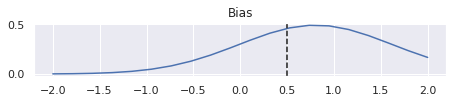

In [423]:
fig = plt.figure()
fig.set_size_inches(6.4, 8)
v = np.linspace(-2, 2, 20)

# Plot weight posteriors
#probs = model.weight.prob(v*np.ones([k, 1]))
#for i in range(k):
    #plt.subplot(k+1, 1, i+1)
    #plt.plot(v, probs[i, :])
    #plt.axvline(x=w_true[i], linestyle='--', color='k')
    #plt.title('W[{}]'.format(i))
    
# Plot Bias posterior
plt.subplot(k+1, 1, k+1)
plt.plot(v, model.bias.prob(v))
plt.axvline(x=0.5, linestyle='--', color='k')
plt.title('Bias')

plt.tight_layout()
plt.show()

In [10]:
class VariationalEstep(tf.keras.Model):
#Optimizes pi and z with fixed phi, B, B0, (a, b are ommitted at the moment)

    def __init__(self, k, n, phi, name=None):
        super(VariationalEstep, self).__init__(name=name)
        self.pi = tf.Variable(tfd.Beta(concentration1=1, concentration0=1).sample([k]), name="pi",constraint=lambda x: tf.clip_by_value(x, 0, 1))
        self.phi = tf.Variable(phi, name="phi",constraint=lambda x: tf.clip_by_value(x, 0, 1))
        self.z = tf.Variable(tfd.RelaxedBernoulli(0.000001, probs=self.phi, validate_args=True, allow_nan_stats=False).sample(n), name="z",constraint=lambda x: tf.clip_by_value(x, 0, 1))
        #self.pi = tf.Variable(tfd.Beta(concentration1=1, concentration0=1).sample([k]), name="pi")
        #self.phi = tf.Variable(phi, name="phi")
        #self.z = tf.Variable(tfd.RelaxedBernoulli(0.000001, probs=self.phi, validate_args=True, allow_nan_stats=False).sample(n), name="z")
        #self.b0 = tf.Variable(tf.exp(tf.random.normal([1])), name='b0')
        #self.s_alpha = tf.Variable(tf.exp(tf.random.normal([1])), name='s_alpha')
        #self.s_beta = tf.Variable(tf.exp(tf.random.normal([1])), name='s_beta')
    
    #@property
    #def ppi(self):
    #    """Variational posterior for the Beta distribution"""
    #    return tfd.Beta(concentration1=self.s_alpha, concentration0=self.s_beta)
    
    @property
    def pz(self):
        """Variational posterior for the bias parameter"""
        #ppi2 = tfd.Beta(concentration1=self.s_a, concentration0=self.s_b)
        return tfd.Bernoulli(probs=self.pi)
    
    # for free z and pi learning    
    def call(self, GrefBlkVars, B0, k, n):
        """Predict p(y|x)"""
        #sample = lambda x: x.sample() if sampling else x.mean()
        return SBM_log_prob(self.z, k, GrefBlkVars, B0)
    
    def KLlosses(self,priorZ,power):
        """Sum of KL divergences between posteriors and priors"""
        prior = tfd.Bernoulli(probs=self.phi)
        # L-2 norm for sparsity + KL #consistency of the continous approximation
        return tf.reduce_sum(tf.pow(self.phi,-1))*10+tf.reduce_sum(tfd.kl_divergence(self.pz, prior))\
        +tf.reduce_sum(tf.abs(self.z-tf.cast(self.pz.sample(self.z.shape[0]), tf.float32)))*power\
        +tf.reduce_sum(tf.abs(self.z-priorZ))#incorporating prior for z
        
    def mUpdate(self, phiNew):
        """Sum of KL divergences between posteriors and priors"""
        self.phi = self.phi.assign(phiNew)

In [11]:
#import tensorflow.keras.backend as kerasB
Gnew = relabel.convert_node_labels_to_integers(H, label_attribute = "term") #initilaization
k = len(Gnew)
label = np.zeros(k)
label[1]=0
label[2]=2
label[3]=0
label[4]=1
label[5]=1
#label[k-1]=4
knew = int(max(label)+1)

# Prior design will be key here, needs external input
L_RATE = 0.005
batchSize = 20
n = len(Gnew)
optimizer = tf.keras.optimizers.Adam(lr=L_RATE)
Y = tf.cast(tf.stack([nx.to_numpy_array(Gnew)]*800), dtype=tf.float32)
data_train = tf.data.Dataset.from_tensor_slices(Y).batch(batchSize).shuffle(500)

#@tf.function
def E_step(y,GrefBlkVars,z):
    with tf.GradientTape() as tape:
        log_prob = tf.reduce_mean(model(GrefBlkVars,0.0,knew,n).log_prob(y))
        kl_loss = model.KLlosses(z)/n*100
        elbo_loss = kl_loss - log_prob
    gradients = tape.gradient(elbo_loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return model

def M_step(z):
    with tf.GradientTape() as tape:
        #log_prob = tf.reduce_mean(model(GrefBlkVars,2.0,k2,n).log_prob(y))
        phi2 = tf.reduce_sum(z, 0)/n
        model.mUpdate(phi2)
    return GrefBlkVars

In [12]:
labelnew = np.where(labelOneHot>0.5,1,0)
labelnew[0,2] = 4
labelnew

NameError: name 'labelOneHot' is not defined

In [ ]:
for i in range(knew):
    if len(np.where(labelnew[:,i]==1)[0])>0:
        for j in range(knew): 
            if (j==i) & len(np.where(labelnew[:,j]==1)[0])>0 : # only update diagonal entries for efficiency
                id1, id2 = zip(*it.product(np.where(labelnew[:,i]==1)[0],np.where(labelnew[:,j]==1)[0])) #cartesian product of the i j blocks
                totalW = sum(nx.to_numpy_array(Gref)[id1, id2]) #total edge weights of the block pair
                GrefBlkVars[i,j] = totalW/len(id1) #averaged over possible edges of the block pair, needs upper-trianglize optimization
GrefBlkVars = tf.convert_to_tensor(np.maximum(GrefBlkVars, GrefBlkVars.T), dtype=tf.float32)

In [480]:
# Function to compute the log posterior probability
import cProfile 
import itertools as it

phi = np.asarray([0.6,0.3,0.1]).astype("float32")
model = VariationalEstep(knew,len(Gnew),phi)
labelOneHot = tf.one_hot(label.astype(int), knew, dtype = "float32")
pz = tf.cast(ed.Bernoulli(probs=labelOneHot, name="z"), dtype=tf.float32)

totalW = sum(sum(nx.to_numpy_array(Gnew)))
GrefBlkVars = np.random.normal(loc = totalW/len(Gnew)/(len(Gnew)-1)*2, scale = 1, size = (knew,knew))
for i in range(knew):
    for j in range(knew): 
        if (j==i): # only update diagonal entries for efficiency
            id1, id2 = zip(*it.product(np.where(labelnew[:,i]==1)[0],np.where(labelnew[:,j]==1)[0])) #cartesian product of the i j blocks
            totalW = sum(nx.to_numpy_array(Gnew)[id1, id2]) #total edge weights of the block pair
            GrefBlkVars[i,j] = totalW/len(id1) #averaged over possible edges of the block pair, needs upper-trianglize optimization
GrefBlkVars = tf.convert_to_tensor(np.maximum(GrefBlkVars, GrefBlkVars.T), dtype=tf.float32)

historyPi=[]
historyZ=[]
for (y_data) in data_train:
    posterior = E_step(y_data,GrefBlkVars,pz)
    #updates hyper parameters
    pi = posterior.pi.numpy()
    z = posterior.z.numpy()
    M_step(z)
    print(pi)
    historyPi.append(pi)
    historyZ.append(z)

/home/yan30/.tfProb/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


NameError: name 'labelnew' is not defined

In [481]:
#import pandas as pd
#pd.DataFrame(ppi.numpy())
model.trainable_variables

[<tf.Variable 'pi:0' shape=(61,) dtype=float32, numpy=
 array([0.21414037, 0.57993   , 0.9758469 , 0.6947797 , 0.01093118,
        0.41041422, 0.89008635, 0.40094918, 0.49161407, 0.51579815,
        0.621885  , 0.22308965, 0.6483214 , 0.9960676 , 0.23547463,
        0.85777146, 0.4849502 , 0.5347854 , 0.5176457 , 0.20416977,
        0.4904928 , 0.4080798 , 0.10095905, 0.00929924, 0.3254886 ,
        0.18513511, 0.3621372 , 0.64141566, 0.8027765 , 0.20061313,
        0.7918964 , 0.14384192, 0.90250987, 0.6786809 , 0.45552182,
        0.3583987 , 0.5341963 , 0.382385  , 0.28110343, 0.22930758,
        0.2434893 , 0.6832179 , 0.73774487, 0.30888322, 0.54661167,
        0.08190932, 0.1310691 , 0.21491034, 0.0852154 , 0.49875635,
        0.3503806 , 0.10075027, 0.2979525 , 0.46009752, 0.61107755,
        0.8093997 , 0.563699  , 0.9903914 , 0.93281   , 0.21944147,
        0.0192202 ], dtype=float32)>,
 <tf.Variable 'phi:0' shape=(3,) dtype=float32, numpy=array([0.6, 0.3, 0.1], dtype=float32)

In [13]:
# Merge quasi-cliques with more than 3 overlapping nodes
def merge_cliques(Clist):
    for i in range(0, len(Clist)):
        c1 = Clist[i]
        for j in range(i+1, len(Clist)):
            c2 = Clist[j]
            if (len(c1.intersection(c2))>1): # define quasi-cliques with number of overlapping nodes
                c3 = c1.union(c2)
                Clist.insert(0,c3)
                Clist.remove(c1)
                Clist.remove(c2)
                return merge_cliques(Clist)
    return Clist

In [251]:
import networkx.algorithms.clique as clique
import itertools as it
import random 

def getCandidatesB(G, Gref, terms):
    parentList = []
    childList= []
    nodeIndex = 0
    for source in terms.values():
        if source in Gref.nodes(): #matched leaf nodes (genes for first layer)
            for target in Gref.successors(source):
                tup = (target,Gref.nodes[target]['level'])
            tup2 = (source,nodeIndex)
            parentList.append(tup)
            childList.append(tup2)
            nodeIndex = nodeIndex + 1
    parentSet = list(set(parentList))
    childSet = list(set(childList))

    merges = []
    for parent in parentSet:
        c = []
        for predecessor in Gref.predecessors(parent[0]): 
            if len(Gref.in_edges(predecessor, data=True)) == 0: #only include leaves
                if predecessor in terms.values():
                    c.append(predecessor)
        merges.append(set(c))
    CliXO = {}    
    nodeSet = sorted(set().union(*merges))
    for x in nodeSet:
        CliXO[x] = []
        for idx, y in enumerate(merges): 
            if (x in y): #only top 2 appearance are considered in Bayesian assignments
                CliXO[x].append(idx)
    k = len(G) #original block number = graph size
    labels = np.arange(k)
    maxLabel = len(merges)
    print(maxLabel)
    print(len(nodeSet))
    knew = k+maxLabel-len(nodeSet) #new block number after mergers
    label1hot = np.zeros([k,knew])
    print(label1hot.shape)
    labelCount = 0
    for idx, row in enumerate(label1hot):
        if idx<len(nodeSet):
            if (childSet[idx][0] in CliXO): #node to be merged according to CliXO
                #print(childSet[idx][0])
                label1hot[childSet[idx][1],CliXO[childSet[idx][0]]] = 1.0
        else:
            label1hot[idx,maxLabel+labelCount] = 1.0
            labelCount = labelCount+1
    if (maxLabel<=3):
        print("Adding CliXO candidates")
        label1hot = getCandidates(G, 500, 50, 5)
    return label1hot

In [250]:
import networkx.algorithms.clique as clique
import itertools as it

def getCandidates(G, top, maxC, maxP):
    edgesTop=sorted(G.edges(data=True), key=lambda t: t[2].get('weight', 1), reverse=True)
    #percent = int(len(edgesTop)/5000) # adjust for layer size
    eList = [(x[0],x[1]) for x in edgesTop[:top]]
    sub = G.edge_subgraph(eList)
    graphs = [sub.subgraph(c) for c in nx.connected_components(sub)]
    #print(len(graphs))
    max_clique_sets = [clique.find_cliques(s) for s in graphs]
    cliques = []
    for clist in max_clique_sets:
        tmp = []
        for c in clist:
            if ((len(c)>=2) & (len(c)<=maxC)): #control size of cliques
                cohesion = 0
                for idx, x in enumerate(c):
                    for idy, y in enumerate(c):
                        if (idy>idx):
                            cohesion = cohesion + G[x][y]['weight']
                tup = (set(c),cohesion/(len(c)-1)) #higher order cliques prioritized
                tmp.append(tup)
        tmp = sorted(tmp, key=lambda t: t[1], reverse=True) #sort cliques
        cliques += tmp[:5] #keep only top 3 cliques for each component
    
    CliList = sorted(cliques, key=lambda t: t[1], reverse=True)
    #print(CliList)
    cliquesFiltered0 = [x[0] for x in CliList]
    cliquesFiltered = merge_cliques(cliquesFiltered0)

    CliXO = {}    
    nodeSet = sorted(set().union(*cliquesFiltered))
    for x in nodeSet:
        CliXO[x] = []
        for idx, y in enumerate(cliquesFiltered): 
            if (x in y) and len(CliXO[x])<maxP: #only top 2 appearance are considered in Bayesian assignments
                CliXO[x].append(idx)
    k = len(G) #original block number = graph size
    labels = np.arange(k)
    maxLabel = len(cliquesFiltered)
    knew = k+maxLabel-len(nodeSet) #new block number after mergers
    label1hot = np.zeros([k,knew])
    print(label1hot.shape)
    labelCount = 0
    for idx, row in enumerate(label1hot):
        if (idx in CliXO): #node to be merged according to CliXO
            label1hot[idx,CliXO[idx]] = 1.0
        else:
            label1hot[idx,maxLabel+labelCount] = 1.0
            labelCount = labelCount+1
    return label1hot

In [17]:
def buildLayer(GnewL, Gref, labelOneHot):
    batchSize = 20
    Y = tf.cast(tf.stack([nx.to_numpy_array(GnewL)]*400), dtype=tf.float32)
    data_train = tf.data.Dataset.from_tensor_slices(Y).batch(batchSize).shuffle(5000)
    n = len(GnewL)
    
    Mlist = []
    knew = labelOneHot.shape[1]
    ppz = ed.Bernoulli(probs=labelOneHot, name="z").numpy().astype("float32")
    phi = tf.reduce_sum(ppz, 0)/n
    # set initial state (drawn from prior built from OG subgraphs)
    # Prior strength tuning parameter
    # Prior design will be key here, needs external input from corresponding OG layer
    modelInner = VariationalEstep(knew,n,phi)
    totalW = sum(sum(nx.to_numpy_array(Gref)))
    GrefBlkVars = np.random.normal(loc = totalW/len(Gref)/(len(Gref)-1)*2, scale = 1, size = (knew,knew))
    labelnew = np.where(labelOneHot>0.5,1,0)
    for i in range(knew):
        if len(np.where(labelnew[:,i]==1)[0])>0:
            for j in range(knew): 
                if (j==i) & len(np.where(labelnew[:,j]==1)[0])>0 : # only update diagonal entries for efficiency
                    id1, id2 = zip(*it.product(np.where(labelnew[:,i]==1)[0],np.where(labelnew[:,j]==1)[0])) #cartesian product of the i j blocks
                    totalW = sum(nx.to_numpy_array(Gref)[id1, id2]) #total edge weights of the block pair
                    GrefBlkVars[i,j] = totalW/len(id1) #averaged over possible edges of the block pair, needs upper-trianglize optimization
    GrefBlkVars = tf.convert_to_tensor(np.maximum(GrefBlkVars, GrefBlkVars.T), dtype=tf.float32)

    for (y_data) in data_train:
        with tf.GradientTape() as tape:
            log_prob = tf.reduce_mean(modelInner(GrefBlkVars,0.0,knew,n).log_prob(y_data))
            kl_loss = modelInner.KLlosses(ppz)/n*100
            elbo_loss = kl_loss - log_prob
        gradients = tape.gradient(elbo_loss, modelInner.trainable_variables)
        optimizer.apply_gradients(zip(gradients, modelInner.trainable_variables))
        phi2 = tf.reduce_sum(modelInner.z, 0)/n
        phi2 = np.where(phi2<0.2,0,phi2) #Adjust for different thresholds
        modelInner.mUpdate(phi2)
    return (log_prob,modelInner) #higher order cliques prioritized

In [308]:
def buildLayerB(GnewL, Gref, labelOneHot, power):
    batchSize = 20
    Y = tf.cast(tf.stack([nx.to_numpy_array(GnewL)]*400), dtype=tf.float32)
    data_train = tf.data.Dataset.from_tensor_slices(Y).batch(batchSize).shuffle(5000)
    n = len(GnewL)
    
    Mlist = []
    knew = labelOneHot.shape[1]
    ppz = ed.Bernoulli(probs=labelOneHot, name="z").numpy().astype("float32")
    phi = tf.reduce_sum(ppz, 0)/n
    # set initial state (drawn from prior built from OG subgraphs)
    # Prior strength tuning parameter
    # Prior design will be key here, needs external input from corresponding OG layer
    modelInner = VariationalEstep(knew,n,phi)
    totalW = sum(sum(nx.to_numpy_array(GnewL)))
    GrefBlkVars = np.random.normal(loc = totalW/len(GnewL)/(len(GnewL)-1)*2, scale = 1, size = (knew,knew))
    labelnew = np.where(labelOneHot>0.5,1,0)
    for i in range(knew):
        if len(np.where(labelnew[:,i]==1)[0])>0:
            for j in range(knew): 
                if (j==i) & len(np.where(labelnew[:,j]==1)[0])>0 : # only update diagonal entries for efficiency
                    id1, id2 = zip(*it.product(np.where(labelnew[:,i]==1)[0],np.where(labelnew[:,j]==1)[0])) #cartesian product of the i j blocks
                    totalW = sum(nx.to_numpy_array(GnewL)[id1, id2]) #total edge weights of the block pair
                    GrefBlkVars[i,j] = totalW/len(id1) #averaged over possible edges of the block pair, needs upper-trianglize optimization
    GrefBlkVars = tf.convert_to_tensor(np.maximum(GrefBlkVars, GrefBlkVars.T), dtype=tf.float32)

    for (y_data) in data_train:
        with tf.GradientTape() as tape:
            log_prob = tf.reduce_mean(modelInner(GrefBlkVars,0.0,knew,n).log_prob(y_data))
            kl_loss = modelInner.KLlosses(ppz,power)/n*100 #update ppz for Bayesian power
            elbo_loss = kl_loss - log_prob
        gradients = tape.gradient(elbo_loss, modelInner.trainable_variables)
        optimizer.apply_gradients(zip(gradients, modelInner.trainable_variables))
        phi2 = tf.reduce_sum(modelInner.z, 0)/n
        phi2 = np.where(phi2<0.2,0,phi2) #Adjust for different thresholds
        modelInner.mUpdate(phi2) #update phi2 for Bayesian power
    modelInner.z = modelInner.z*0.7+ppz*0.3
    return (log_prob,modelInner)

In [277]:
def updateDAG(G, NodeMerge, terms):
    size = len(NodeMerge);
    nodeSet = sorted(set().union(*NodeMerge))
    A = nx.adjacency_matrix(G).todense()
    while len(NodeMerge)>0:
        nodes = NodeMerge.pop()
        newNodeV = np.sum(A[nodes,:],axis=0)/len(nodes)
        B = np.vstack([A, newNodeV])
        newNodeC = np.sum(B[:,nodes],axis=1)/len(nodes)
        A = np.column_stack([B, newNodeC])
        
    #print(nodeSet)
    A = np.delete(A, nodeSet, axis = 0)
    #print(A.shape)
    A = np.delete(A, nodeSet, axis = 1)
    dt=[('weight',float)]
    A = np.matrix(A,dtype=dt)
    np.fill_diagonal(A, 0)
    Gnew = nx.from_numpy_matrix(A)
    Gnew = relabel.convert_node_labels_to_integers(Gnew,label_attribute = "term") 
    
    for node in nodeSet:
        if node in terms:
            del terms[node]
    return Gnew, {i:v for i,(k,v) in enumerate(terms.items(),0)}

In [546]:
Gref = nx.from_pandas_edgelist(df,1,0,[2],nx.DiGraph)
#G0 = nx.contracted_nodes(Gref, "Direct Repair", "ALKBH3", self_loops=False) 
#mapping = {'ACD':'subsystem0'}
#G0 = nx.relabel_nodes(G0, mapping)
terms = ["ALKBH2","ALKBH3","MGMT","TFPT"]
nodes = [0,1,2]
mapping = []
parentRefs = []
for kid in nodes:
    if (terms[kid] in Gref):
        parentRefs.append(set([n for n in Gref.successors(terms[kid])]))
parentRefs0 = set(parentRefs[0]).intersection(*parentRefs)
theParent = parentRefs0.pop()
kidsTerms = [terms[node] for node in nodes]
#if kidsTerms == [n for n in Gref.predecessors(theParent)]:
mapping.append({"subsystem0":theParent})
print("subsystem0"+":"+theParent)
Gref = nx.relabel_nodes(Gref, {theParent:"subsystem0"})
print([n for n in Gref.predecessors("subsystem0")])
for kid in nodes:
    Gref.remove_node(terms[kid])
print([n for n in Gref.predecessors("subsystem0")])

KeyError: 'pop from an empty set'

In [162]:
def updateDAGB(G, Gref, NodeMerge, internals, terms):    
    size = len(NodeMerge);
    nodeSet = sorted(set().union(*NodeMerge))
    A = nx.adjacency_matrix(G).todense()
    mapping = []

    while len(NodeMerge)>0:
        nodes = NodeMerge.pop()
        internal = internals.pop()
        newNodeV = np.sum(A[nodes,:],axis=0)/len(nodes)
        B = np.vstack([A, newNodeV])
        newNodeC = np.sum(B[:,nodes],axis=1)/len(nodes)
        A = np.column_stack([B, newNodeC])
        #updating the ref graph if merger is matched perfectly
        parentRefs = []
        #print("mergers: ") 
        for kid in nodes:
            #print(terms[kid])
            if (terms[kid] in Gref):
                parentRefs.append(set([n for n in Gref.successors(terms[kid])]))
        #print("internals: ")
        #print(internal)
        if len(parentRefs)>0:
            parentRefs0 = set(parentRefs[0]).intersection(*parentRefs)
            if len(parentRefs0)>0:
                theParent = parentRefs0.pop()
                kidsTerms = [terms[node] for node in nodes]
                if kidsTerms == [n for n in Gref.predecessors(theParent)]:
                    mapping.append({internal:theParent})
                    Gref = nx.relabel_nodes(Gref, {theParent:internal})
                    for kid in nodes:
                        if (terms[kid] in Gref):
                            Gref.remove_node(terms[kid])

    #print(nodeSet)
    A = np.delete(A, nodeSet, axis = 0)
    #print(A.shape)
    A = np.delete(A, nodeSet, axis = 1)
    dt=[('weight',float)]
    A = np.matrix(A,dtype=dt)
    np.fill_diagonal(A, 0)
    Gnew = nx.from_numpy_matrix(A)
    Gnew = relabel.convert_node_labels_to_integers(Gnew,label_attribute = "term") 

    for node in nodeSet:
        if node in terms:
            del terms[node]
    return Gnew, Gref, mapping, {i:v for i,(k,v) in enumerate(terms.items(),0)}

In [205]:
np.max(ModelPosterior[1].z.numpy())

0.0

In [339]:
from collections import Counter
from networkx import relabel
import cProfile 
import itertools as it

#def f():
Gnew = relabel.convert_node_labels_to_integers(Gorig, label_attribute = "term") #initilaization
terms = nx.get_node_attributes(Gnew, 'term') # initilaizatial dictionary for ddot ontology output
maps = [] # for ddot ontology output
gModel = [] # for generative modeling
subsystem = 0 # for ddot ontology output
loop=0
L_RATE = 0.005
optimizer = tf.keras.optimizers.Adam(lr=L_RATE)
#
Gref = nx.from_pandas_edgelist(df,1,0,[2],nx.DiGraph)
for node in Gref.nodes():
    if len(Gref.in_edges(node, data=True)) == 0: #terminal nodes
        Gref.nodes[node]['level'] = 0
    else: Gref.nodes[node]['level'] = -1
level = 0
newLevel = 0
while  newLevel == level:
    newLevel = get_level(level)
    level += 1
    
print("entering supervised stage")        
#consistency between ref and bayesian posterior required after Supervised levels    
while True:
    k = len(Gnew)
    print(k)
    label1hot = getCandidatesB(Gnew, Gref, terms) #G, top, maxC, maxP
    #label1hot0 = getCandidates(Gnew, 500, 50, 5) #G, top, maxC, maxP
    #combine label1hot with label1hot0's additional columns via a Bayesian parameter
    if label1hot.shape[1]<= 1: #catch final top block before merging
        print("root block")
        break 
    ModelPosterior = buildLayerB(Gnew, Gref, label1hot, 10)
    print(np.max(ModelPosterior[1].z.numpy())) 
    #newInternal = np.where(np.asarray(ModelPosterior) > thresh)[0] #keep Bayesian candidates above threshold

    NodeMerge = [] #nodes to be merged, nested lists of motifs
    newNode = []
    #for node in Gnew.nodes():
        #gModel.append(str(loop)+"th loop:"+terms[node])
    
    newLabel = ModelPosterior[1].z.numpy()
    threshold = max(0.5,np.percentile(newLabel, 50))#-0.05*(loop))
    newLabelC = np.where(newLabel>=threshold,1,0) #Adjust for different thresholds
    dup = np.where(np.sum(newLabelC,axis=0)>0)[0] #list only duplicate labels where merges could happen
    newCount = label1hot.shape[0] + len(dup)
    print(threshold)
    for dupL in dup: 
        nodes = np.where(newLabelC[:,dupL]>0)[0] #[0] to strip np.where outer brackets
        #print(nodes)
        #if(all(not set(nodes).issubset(set(x)) for x in NodeMerge)):
        NodeMerge.append(nodes)
        for node in nodes: #update ddot ontology with new merges
            gModel.append((terms[node],"subsystem"+str(subsystem),"zPosterior:", newLabel[node,dupL])) #update ddot ontology
        terms[len(terms)] = "subsystem"+str(subsystem)
        newNode.append(terms[len(terms)-1])
        subsystem += 1
    #gModel.append((str(loop)+"th posterior",newLabel))
    nodeSet = sorted(set().union(*NodeMerge))
    newCount = newCount - len(nodeSet)
    Gnew, Gref, mapping, terms = updateDAGB(Gnew, Gref, NodeMerge, newNode, terms) #update the graph with node mergers/splits  
    maps.append(mapping)
    print(len(terms))
    print("looping")
    loop += 1
#cProfile.run('f()')

entering supervised stage
306
45
231
(306, 120)
0.9318061
0.5
180
looping
180
32
76
(180, 136)
0.9257913
0.5
152
looping
152
13
23
(152, 142)
0.9090347
0.5
144
looping
144
5
6
(144, 143)
0.8948566
0.5
154
looping
154
2
3
(154, 153)
Adding CliXO candidates
(154, 139)
0.58275294
0.5
143
looping
143
1
1
(143, 143)
Adding CliXO candidates
(143, 132)
0.8718429
0.5
141
looping
141
0
0
(141, 141)
Adding CliXO candidates
(141, 128)
0.56277114
0.5
136
looping
136
0
0
(136, 136)
Adding CliXO candidates
(136, 124)
0.8516786
0.5
135
looping
135
0
0
(135, 135)
Adding CliXO candidates
(135, 124)
0.84405345
0.5
131
looping
131
0
0
(131, 131)
Adding CliXO candidates
(131, 121)
0.8376817
0.5
124
looping
124
0
0
(124, 124)
Adding CliXO candidates
(124, 114)
0.83053774
0.5
108
looping
108
0
0
(108, 108)
Adding CliXO candidates
(108, 97)
0.82299876
0.5
102
looping
102
0
0
(102, 102)
Adding CliXO candidates
(102, 91)
0.81740206
0.5
94
looping
94
0
0
(94, 94)
Adding CliXO candidates
(94, 83)
0.81206286
0.5


In [333]:
maps

[[],
 [],
 [],
 [{'subsystem329': 'Rad17-Mec3- Ddc1 complex'}],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 []]

In [297]:
sorted(gModel, key=lambda t: t[3], reverse=False)

[('subsystem899', 'subsystem912', 'zPosterior:', 0.71553206),
 ('subsystem895', 'subsystem907', 'zPosterior:', 0.7201831),
 ('subsystem899', 'subsystem906', 'zPosterior:', 0.72041565),
 ('subsystem905', 'subsystem913', 'zPosterior:', 0.7215875),
 ('subsystem894', 'subsystem911', 'zPosterior:', 0.72205776),
 ('subsystem894', 'subsystem906', 'zPosterior:', 0.722134),
 ('subsystem882', 'subsystem906', 'zPosterior:', 0.72215486),
 ('subsystem882', 'subsystem908', 'zPosterior:', 0.72236454),
 ('subsystem895', 'subsystem910', 'zPosterior:', 0.7228063),
 ('subsystem905', 'subsystem906', 'zPosterior:', 0.7228153),
 ('subsystem895', 'subsystem906', 'zPosterior:', 0.72318125),
 ('subsystem884', 'subsystem908', 'zPosterior:', 0.7244699),
 ('subsystem881', 'subsystem906', 'zPosterior:', 0.7245211),
 ('subsystem893', 'subsystem913', 'zPosterior:', 0.7256955),
 ('subsystem885', 'subsystem908', 'zPosterior:', 0.72590625),
 ('subsystem903', 'subsystem906', 'zPosterior:', 0.7260094),
 ('subsystem880', 

In [340]:
import pickle

with open('DAGdump/hierarchy03-co-expression.save', 'wb') as fp:
    pickle.dump(gModel, fp)

In [456]:
from collections import Counter
from networkx import relabel
import cProfile 
import itertools as it

#def f():
Gnew = relabel.convert_node_labels_to_integers(Gorig, label_attribute = "term") #initilaization
terms = nx.get_node_attributes(Gnew, 'term') # initilaizatial dictionary for ddot ontology output
maps = [] # for ddot ontology output
gModel = [] # for generative modeling
subsystem = 0 # for ddot ontology output
loop=0
L_RATE = 0.005
optimizer = tf.keras.optimizers.Adam(lr=L_RATE)
#
print("entering un-supervised stage")        
#consistency between ref and bayesian posterior required after Supervised levels    
while True:
    k = len(Gnew)
    print(k)
    #label1hot = getCandidatesB(Gnew, Gref, terms) #G, top, maxC, maxP
    label1hot = getCandidates(Gnew, 500, 50, 5) #G, top, maxC, maxP
    #print(label1hot.shape)
    if label1hot.shape[1]<= 1: #catch final top block before merging
        print("root block")
        break 
    ModelPosterior = buildLayer(Gnew, Gnew, label1hot)
    print(ModelPosterior[0]) 
    #newInternal = np.where(np.asarray(ModelPosterior) > thresh)[0] #keep Bayesian candidates above threshold

    NodeMerge = [] #nodes to be merged, nested lists of motifs
    newNode = []
    #for node in Gnew.nodes():
        #gModel.append(str(loop)+"th loop:"+terms[node])
    
    newLabel = ModelPosterior[1].z.numpy()
    threshold = max(0.2,np.percentile(newLabel, 50))#-0.05*(loop))
    newLabelC = np.where(newLabel>=threshold,1,0) #Adjust for different thresholds
    dup = np.where(np.sum(newLabelC,axis=0)>1)[0] #list only duplicate labels where merges could happen
    newCount = label1hot.shape[0] + len(dup)
    print(threshold)
    print(len(terms))
    for dupL in dup: 
        nodes = np.where(newLabelC[:,dupL]>0)[0] #[0] to strip np.where outer brackets
        #print(nodes)
        #if(all(not set(nodes).issubset(set(x)) for x in NodeMerge)):
        NodeMerge.append(nodes)
        for node in nodes: #update ddot ontology with new merges
            gModel.append((terms[node],"subsystem"+str(subsystem),"zPosterior:", newLabel[node,dupL])) #update ddot ontology
        terms[len(terms)] = "subsystem"+str(subsystem)
        newNode.append(terms[len(terms)-1])
        subsystem += 1
    #gModel.append((str(loop)+"th posterior",newLabel))
    nodeSet = sorted(set().union(*NodeMerge))
    newCount = newCount - len(nodeSet)
    print(len(terms))
    Gnew, terms = updateDAG(Gnew, NodeMerge, terms) #update the graph with node mergers/splits  
    maps.append(mapping)
    loop += 1
#cProfile.run('f()')

entering un-supervised stage
437
tf.Tensor(-60637.59, shape=(), dtype=float32)
0.2
437
529
310
tf.Tensor(-59399.164, shape=(), dtype=float32)
0.2
310
381
207
tf.Tensor(-34557.34, shape=(), dtype=float32)
0.2
207
246
145
tf.Tensor(-66290.945, shape=(), dtype=float32)
0.2
145
194
104
tf.Tensor(-27318.57, shape=(), dtype=float32)
0.2
104
126
74
tf.Tensor(-26224.045, shape=(), dtype=float32)
0.2
74
90
52
tf.Tensor(-7387.33, shape=(), dtype=float32)
0.2
52
59
30
root block


In [147]:
#{i:v for i,(k,v) in enumerate(terms.items(),0)}
sorted(gModel, key=lambda t: t[3], reverse=False)

{0: 'subsystem285'}

In [104]:
import pickle

with open('resultNew/hierarchy-base.save', 'wb') as fp:
    pickle.dump(gModel, fp)

In [151]:
Gnew = relabel.convert_node_labels_to_integers(Gorig, label_attribute = "term") #initilaization
Gref = nx.from_pandas_edgelist(df,1,0,[2],nx.DiGraph)
genes = [u for u,v,e in Gref.edges(data=True) if e[2] == 'Gene-Term']
len(Gnew.nodes())-len(set(genes))
for u in Gref.nodes(data=True):
    [x for x,y in Gnew.nodes(data=True) if y['term']==5]

In [ ]:
Gnew = relabel.convert_node_labels_to_integers(Gorig, label_attribute = "term") #initilaization
Gnew.nodes(data=True)

In [ ]:
k = len(Gnew)
print(k)
labels = np.arange(k)
parentList = []
for source, target in Gref.edges(): #calculate logLikeRatio along edges
    if len(Gref.in_edges(source, data=True)) == 0: #leaf nodes (genes)
        parentList.append(target)
random.shuffle(parentList)
parentSet = set(parentList[:5])      
print(parentSet)

merges = []
for parent in parentSet:
    c = []
    for predecessor in Gref.predecessors(parent): #updat
        #print(predecessor)
        if len(Gref.in_edges(predecessor, data=True)) == 0:
            c.append(predecessor)
    merges.append(set(c))
print(merges)
        
CliXO = {}    
nodeSet = sorted(set().union(*merges))
for x in nodeSet:
    CliXO[x] = []
    for idx, y in enumerate(merges): 
        if (x in y) and len(CliXO[x])<3: #only top 2 appearance are considered in Bayesian assignments
            CliXO[x].append(idx)
combinations = it.product(*(CliXO[Name] for Name in nodeSet))    
Llist = []
for update in combinations:
    #print(update)
    labelsNew = labels.copy()    
    for idx, x in enumerate(update):        
        nodeIDs = [x for x,y in Gnew.nodes(data=True) if y['term']==nodeSet[idx]]
        labelsNew[nodeIDs[0]] = len(labels)+x
    b,c =np.unique(labelsNew, return_inverse=True)
    Llist.append(c)

In [ ]:
with open('resultNew/hierarchyQnew2Merge.save', 'wb') as fp:
    pickle.dump(list(G_new.edges), fp)

In [ ]:
sorted([n for n in G.in_degree()], reverse=True)  # degree sequence
inDegrees = G.in_degree()
for node, iDegree in inDegrees():    # for name, age in dictionary.iteritems():  (for Python 2.x)
    if iDegree == 3:
        print(node)

In [ ]:
for n, nbrs in G.adj.items():
    print(G.nodes.data()[n])
    print(G.in_edges(n, data=True))

In [ ]:
edgesTop